$y = ax + b$  
$y = 0 w1*x1 + w2*x2 <= \theta$  
$y = 1 w1*x1 + w2*x2 > \theta$  

bias(편향)  
-  가중치와 편향을 도입한 퍼셉트론 식
-  $\theta$ 를 $-b$로 치환하면
    -  $a1x1+a2x2+b <= 0$ 일 때 $y=0$
    -  $a1x1+a2x2+b > 0$ 일 때 $y=1$

In [13]:
import numpy as np
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.7
np.sum(x*w)+b

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp >0:
        return 1
    
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp >0:
        return 1

def XOR(x1, x2):
    s1 = OR(x1, x2)
    s2 = NAND(x1, x2)
    y = AND(s1, s2)
    return y

In [12]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


In [15]:
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


# 인공신경망(ANN, Artificial Neural Network)
-  인간의 뇌 구조를 모방하여 모델링한 수학적 모델

-  ## 신경세포(neuron 뉴런)
    -  뉴런의 입력은 다수이고 출력은 하나이며, 여러 신경세포로부터 전달되어 온 신호들은 합산되어 출력된다.
    -  합산된 값이 설정값(threshold) 이상이면 출력신호가 생기고, 이하면 출력신호가 없다.
    
-  ## 세포체(cell body): 노드(node)
-  ## 수상돌기(dendrites): 입력(input)
-  ## 축삭(axon): 출력(output)
-  ## synapse weight(가중치)
```
input --> neuron --> output
                 ^
                 |
               bias
```

-  affine sum
```
              weight w
input x ------------->  sum  ------------> y output
                             ^
                             |
                           bias b
```
    -  sum($\sigma$) = $w * x + b$
    -  $x = 0.6$
    -  $w = 3$
    -  $b = 1$
    -  $\sigma = 0.6 * 3 + 1 = 2.8$ 

-  활성화함수(activation function)
    -  synapse는 전달된 전기신호가 최소한의 자극값을 초과하면 활성화되어 다음 뉴런으로 전기신호를 전달한다.
    -  활성화 함수는 이것을 모방하여 값이 작을때는 출력값을 작은값으로 막고 일정한 값을 초과하면 출력값이 급격히 커지는 함수를 이용한다. 

    -  계단함수
        -  임계값을 경계로 출력이 바뀌는 함수
        -  입력이 0을 넘으면 1을 출력하고 그 외에는 0을 출력하는 함수
            ```
            def step_function(x):
                if x > 0:
                    return 1
                else:
                    return 0
            ```
        -  계단함수는 0과 1중 하나의 값만 전달
        -  계단함수는 계단처럼 구부러진 직선
        
    -  sigmoid(시그모이드)
        -  신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고 그 변환된 신호를 다음 뉴런에 전달한다
        -  $e^{-x}$ *e는 자연상수 2.7182, np.exp(-x)*
        
        -  시그모이드 함수는 0과 1사이의 실수값을 전달
        -  선형함수는 직선 하나만 표현
        -  신경망에서는 활성함수로 비선형함수를 사용해야 한다
        -  비선형함수를 사용해야 은닉층을 표현할 수 있다

    -  ReLU(Rectified Linear Unit)
        -  입력이 0을 넘으면 그 입력값으로 그대로 출력하고 0 이하면 0을 출력한다.

In [16]:
import numpy as np

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

step_function(1)

1

In [18]:
step_function(np.array([1,2])) # 에러

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y.astype(np.int) # astype 자료형 변환(bool -> int)

array([0, 1, 1])

In [22]:
def step_function(x):
    import numpy as np
    y = x >0
    return y.astype(np.int)

In [23]:
step_function(np.array([-1.0, 1.0, 2.0]))

array([0, 1, 1])

In [24]:
def step_function(x):
    import numpy as np
    return np.array(x>0, dtype=np.int)

In [25]:
step_function(np.array([-1.0, 1.0, 2.0]))

array([0, 1, 1])

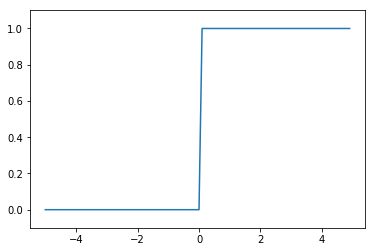

In [27]:
import matplotlib.pylab as plt
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

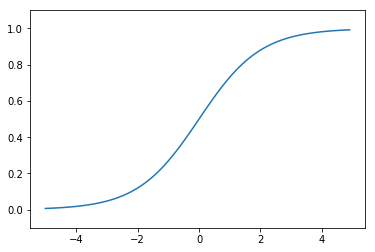

In [28]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [43]:
def ReLU(x):
    return [i if i > 0 else 0 for i in x ]

ReLU(np.array([-1.2, 0, 1.1, 10]))

[0, 0, 1.1, 10.0]

In [44]:
def ReLu(x):
    return np.maximum(0, x)

ReLU(np.array([-1.2, 0, 1.1, 10]))

[0, 0, 1.1, 10.0]

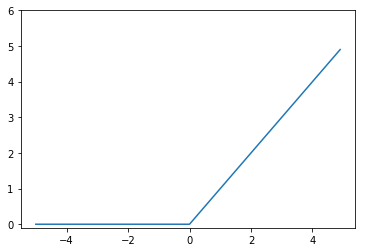

In [45]:
x = np.arange(-5.0, 5.0, 0.1)
y = ReLu(x)
plt.plot(x,y)
plt.ylim(-0.1, 6)
plt.show()

In [46]:
import numpy as np
a = np.array([1,2,3,4])
np.ndim(a) # 배열의 차원 수 리턴

1

In [47]:
x = np.array([[1,2],[3,4],[5,6]])
np.ndim(x)
x.shape

(3, 2)

In [50]:
# 행렬의 내적 계산
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
print(x.shape, y.shape)

(2, 2) (2, 2)


 x    y    z(행렬의 내적)
1 2  5 6   $1*5+2*7$  $1*6+2*8$
3 4  7 8   $3*5+4*7$  $3*6+4*8$

In [51]:
np.dot(x,y)

array([[19, 22],
       [43, 50]])

In [52]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[1,2],[3,4],[5,6]])
np.dot(x,y)

array([[22, 28],
       [49, 64]])

In [53]:
x = np.array([[1,2,],[3,4],[5,6]])
y = np.array([7,8])
np.dot(x,y)

array([23, 53, 83])

In [54]:
x = np.array([1,2])
w = np.array([[1,3,5],[2,4,6]])
y = np.dot(x,w)

In [55]:
y

array([ 5, 11, 17])

In [58]:
x = np.array([1.0, 0.5]) # 입력층

w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])
a1 = np.dot(x, w1) + b1 # affine sum
z1 = sigmoid(a1)

w2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])
a2 = np.dot(z1, w2) + b2
z2 = sigmoid(a2)

w3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])
a3 = np.dot(z2, w3) + b3

# 항등함수: 입력을 그대로 출력한다. 입력 = 출력
def identity_function(x):
    return x
y = identity_function(a3)

# softmax function 지수값으로 출력한다.
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
exp_a / sum_exp_a

array([0.01821127, 0.24519181, 0.73659691])

In [59]:
def softmax_function(x):
    exp_x = np.exp(x)
    return exp_x/np.sum(exp_x)    

In [60]:
# softmax의 단점 - 큰 수는 처리하지 못함
a = np.array([100, 1000, 10000])
softmax_function(a)

C:\Users\stu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 0., nan, nan])

In [59]:
def softmax_function(x):
    m = np.max(x)
    exp_x = np.exp(x-m)
    return exp_x/np.sum(exp_x)